In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Logistic regression(from scratch)

Accuracy: 0.5556

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[20  0]
 [ 0 10]]


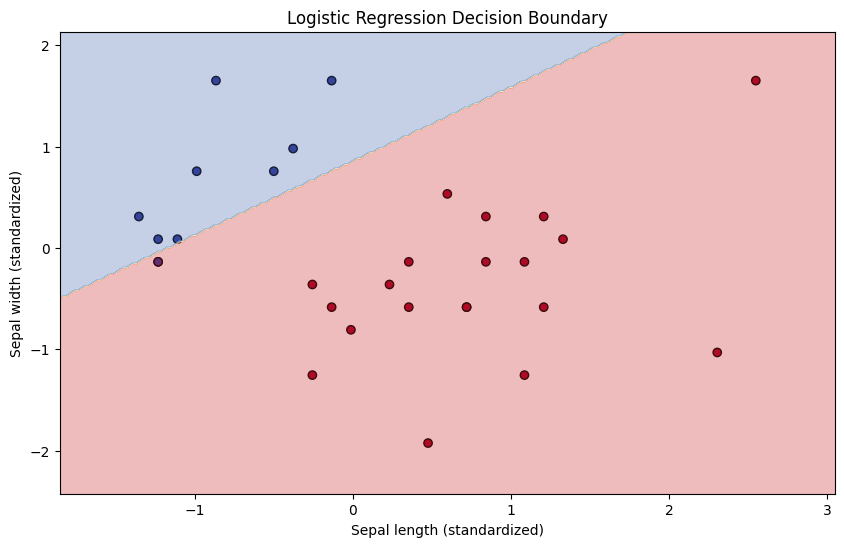

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix 



class LogisticRegression:
    def __init__(self,learning_rate=0.01,num_iterations=1000):
        self.learning_rate = learning_rate
        self.no_iterations = num_iterations
        self.weights = None
        self.bias = None
        
    #sigmoid
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    
    #Initialize parameters
    def initialize_para(self,num_features):
        self.weights = np.zeros((num_features,1))
        self.bias = 0
        
    
    #Fit
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.initialize_para(num_features)
        
        for _ in range(self.no_iterations):
            z = np.dot(X,self.weights) + self.bias
            y_pred = self.sigmoid(z)
            
            dw = (1/num_samples)*np.dot(X.T,(y_pred-y))
            db = (1/num_samples)*np.sum(y_pred-y)
            
            
            self.weights -= self.learning_rate*dw
            self.bias -= self.learning_rate*db
            
            
    #predict probability
    def predict_proba(self,X):
        z = np.dot(X,self.weights)+self.bias
        return self.sigmoid(z)
    
    #Predict
    def predict(self,X,threshold=0.5):
        probailities = self.predict_proba(X)
        return (probailities >= threshold).astype(int)
    
    #Score
    def score(self,X,y):
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        return accuracy            
            
            
            
            
            
            
            
            
iris = load_iris()
X = iris.data
y = (iris.target == 0).astype(int)  # Binary classification: Iris Setosa (1) vs Others (0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
model = LogisticRegression(learning_rate=0.01, num_iterations=900)
model.fit(X_train_scaled, y_train.reshape(-1, 1))

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy
accuracy = model.score(X_test_scaled, y_test)
print(f"Accuracy: {accuracy:.4f}")

# Print a more detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualize decision boundary (using only the first two features for simplicity)
plt.figure(figsize=(10, 6))
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap=plt.cm.RdYlBu, edgecolor='black')

# Plot decision boundary
x1_min, x1_max = X_test_scaled[:, 0].min() - 0.5, X_test_scaled[:, 0].max() + 0.5
x2_min, x2_max = X_test_scaled[:, 1].min() - 0.5, X_test_scaled[:, 1].max() + 0.5
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z = model.predict(np.c_[xx1.ravel(), xx2.ravel(), np.zeros_like(xx1.ravel()), np.zeros_like(xx1.ravel())])
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.xlabel('Sepal length (standardized)')
plt.ylabel('Sepal width (standardized)')
plt.title('Logistic Regression Decision Boundary')
plt.show()
        